# Biblioteki Pythona w analizie danych

## Tomasz Rodak

Wykład 2

---

Literatura:

- [PRML](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf) Christopher M. Bishop, "Pattern Recognition and Machine Learning", 2006.
- [PML-1](https://probml.github.io/pml-book/) Kevin P. Murphy, "Probabilistic Machine Learning: An Introduction", 2022.
- [Dokumentacja NumPy](https://numpy.org/doc/stable/)

# NumPy

Dokumentacja: [https://numpy.org/doc/stable/](https://numpy.org/doc/stable/)

Biblioteka do przetwarzania numerycznego dużych wielowymiarowych tablic liczbowych. 

Typowy import:

In [1]:
import numpy as np

## Cechy NumPy

### Przetwarzane obiekty

* **Obiekty typu `ndarray`** - tablice wielowymiarowe, w których wszystkie elementy są ustalonego typu (homogeniczne)
* **Uniwersalne funkcje (`ufuncs`)** - funkcje, które przenoszą operacje na tablicach na poziom elementów tablicy

### Mechanizmy wykorzystywane w NumPy

* **Indeksacja:** Umożliwia selektywny dostęp do elementów tablicy. Obejmuje standardowe wycinanie (slicing), indeksowanie za pomocą list, tablic logicznych oraz tzw. indeksowanie zaawansowane, co pozwala na efektywną modyfikację i ekstrakcję danych.

* **Wektoryzacja:** Polega na wykonywaniu operacji matematycznych na całych tablicach, bez konieczności stosowania pętli. Dzięki temu operacje są znacznie szybsze i bardziej czytelne, wykorzystując niskopoziomowe optymalizacje.

* **Broadcasting:** Mechanizm, który umożliwia operacje arytmetyczne na tablicach o różnych kształtach. Mniejsze tablice są „rozszerzane” (broadcasted) do rozmiarów większych, co pozwala na wykonywanie operacji elementowych bez kopiowania danych.v

## `np.ndarray`

Główny typ definiowany przez bibliotekę Numpy.

* Reprezentuje jedno lub wielowymiarową tablicę wartości. Jest to podstawowa klasa definiowana przez bibliotekę.
* Wszystkie wartości w tablicy musza być tego samego typu, czyli `np.ndarray` jest tablicą jednorodną (homogeniczną).
* Każda wartość zajmuje tę samą określoną przez typ porcję pamięci.

## `np.array()`

Tworzy tablice z ["tablicopodobnych"](https://numpy.org/doc/stable/user/basics.creation.html?highlight=array_like) obiektów, np. z list:

In [2]:
a = np.array([[1, 2, 3], [7, 8, 9]])
a

array([[1, 2, 3],
       [7, 8, 9]])

## `dtype`

Wspólny typ dla wszystkich wartości w tablicy:

In [3]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [4]:
a = np.array([1.5, 2, 3.14])
a.dtype

dtype('float64')

## NumPy: typy wbudowane

Data type |Description
---|---
bool_ |Boolean (True or False) stored as a byte
int_ |Default integer type (same as C long; normally either int64 or int32)
intc |Identical to C int (normally int32 or int64)
intp |Integer used for indexing (same as C ssize_t; normally either int32 or int64)
int8 |Byte (-128 to 127)
int16 |Integer (-32768 to 32767)
int32 |Integer (-2147483648 to 2147483647)
int64 |Integer (-9223372036854775808 to 9223372036854775807)
uint8 |Unsigned integer (0 to 255)
uint16 |Unsigned integer (0 to 65535)
uint32 |Unsigned integer (0 to 4294967295)
uint64 |Unsigned integer (0 to 18446744073709551615)
float_ |Shorthand for float64.
float16 |Half precision float: sign bit, 5 bits exponent, 10 bits mantissa
float32 |Single precision float: sign bit, 8 bits exponent, 23 bits mantissa
float64 |Double precision float: sign bit, 11 bits exponent, 52 bits mantissa
complex_ |Shorthand for complex128.
complex64 |Complex number, represented by two 32-bit floats
complex128 |Complex number, represented by two 64-bit floats

## Atrybuty tablic

* `.ndim` -- liczba wymiarów, liczba całkowita.
* `.shape` -- rozmiar każdego z wymiarów, krotka liczb całkowitych.
* `.size` -- całkowita liczba wartości, iloczyn wartości z krotki `.shape`.

<center>
<img src="tablica2D.png"/>
</center>

## [Tablice stałe](https://numpy.org/doc/stable/reference/routines.array-creation.html#ones-and-zeros)

Tablice stałe to tablice, które mają wszystkie elementy ustawione na tę samą wartość. NumPy dostarcza kilka funkcji do tworzenia takich tablic:

* **`np.zeros()`** – tworzy tablicę wypełnioną zerami.
* **`np.ones()`** – tworzy tablicę wypełnioną jedynkami.
* **`np.full()`** – tworzy tablicę o określonym kształcie, wypełnioną podaną wartością.
* **`np.eye()`** – generuje macierz, w której elementy na głównej przekątnej są jedynkami, a pozostałe zerami.
* **`np.identity()`** – zwraca kwadratową macierz jednostkową (tożsamościową).
* **`np.*_like()`** – funkcje (np. `np.zeros_like()`, `np.ones_like()`, `np.full_like()`) tworzą tablice o tym samym kształcie i typie danych, co podana tablica, ale wypełnione zerami, jedynkami lub inną wartością.

## Definiowanie tablicy o zadanym kształcie

Podane wyżej funkcje, jak i wiele innych generujących tablice, przyjmują argument `shape` (czasem `size`, np. `np.random.normal()`), który określa kształt tablicy wynikowej. 

Pouczającym ćwiczeniem jest próba własnej implementacji funkcji generującej tablicę w postaci listy list o zadanym kształcie. Oto przykład implementacji funkcji `np.full()`: 

In [5]:
def f(shape, fill=0):
    '''Zwraca tablicę o kształcie shape wypełnioną wartością fill.'''
    if len(shape) == 0:
        return fill
    else:
        a, *q = shape
        return a * [f(q, fill)]

Oczywiście, w praktyce nie ma potrzeby implementowania takich funkcji, ponieważ NumPy dostarcza gotowe, zoptymalizowane implementacje. Tym niemniej tego typu zadania stanowią dobry trening zdolności programistycznych.

## [Tablice z danych](https://numpy.org/doc/stable/reference/routines.array-creation.html#from-existing-data)

* **`np.array()`** – Konwertuje dane wejściowe (np. listy, krotki) na tablicę ndarray.
* **`np.asarray()`** – Podobnie jak `np.array()`, ale nie kopiuje danych, gdy już są tablicą NumPy.
* **`np.copy()`** – Tworzy głęboką kopię tablicy, co zapewnia niezależność oryginału i kopii.
* **`np.fromfile()`** – Wczytuje dane binarne z pliku, tworząc z nich tablicę.
* **`np.fromfunction()`** – Generuje tablicę na podstawie funkcji, która jest wywoływana dla każdego indeksu.
* **`np.fromiter()`** – Tworzy tablicę z dowolnego iterowalnego obiektu, np. generatora.
* **`np.fromstring()`** – Konwertuje dane zawarte w łańcuchu znaków na tablicę, dzieląc tekst według separatorów.
* **`np.loadtxt()`** – Ładuje dane tekstowe z pliku do tablicy, przydatne przy pracy z danymi zapisanymi w formacie tekstowym.

## [Tablice zakresów liczbowych](https://numpy.org/doc/stable/reference/routines.array-creation.html#numerical-ranges)

* **`np.arange()`** – Generuje tablicę z wartościami o stałym kroku, podobnie jak funkcja `range()`, ale zwraca obiekt `ndarray`.
* **`np.linspace()`** – Zwraca tablicę z określoną liczbą równomiernie rozmieszczonych wartości w zadanym przedziale.
* **`np.logspace()`** – Tworzy tablicę wartości rozmieszczonych równomiernie na skali logarytmicznej.
* **`np.geomspace()`** – Generuje tablicę wartości rozmieszczonych równomiernie w skali geometrycznej (iloczynowo).
* **`np.meshgrid()`** – Tworzy siatkę współrzędnych na podstawie podanych wektorów; umożliwia przygotowanie danych do wizualizacji lub obliczeń na wielowymiarowych funkcjach.

### Użycie `np.linspace()` do generowania punktów na wykresie

Funkcje rysujące wykresy, np. `matplotlib.pyplot.plot()` czy `seaborn.lineplot()`, pobierają współrzędne punktów z tablic dla poszczególnych osi. Zatem jeśli chcemy narysować wykres funkcji na płaszczyźnie, to musimy dostarczyć dwie tablice: jedną ze współrzędnymi x, drugą ze współrzędnymi y. Funkcja `np.linspace()` pozwala na wygodne generowanie tablicy 1D z równomiernie rozmieszczonymi punktami na zadanym przedziale. W ten sposób możemy wygenerować tablicę z punktami na osi x, a następnie obliczyć wartości funkcji dla tych punktów i zapisać je w tablicy z punktami na osi y.

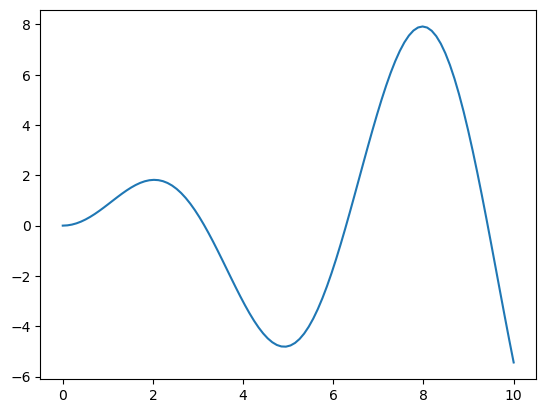

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

# Rysujemy wykres funkcji f(x) = x * sin(x)
n = 100 # liczba argumentów funkcji
x = np.linspace(0, 10, n) # generujemy n równo rozmieszczonych punktów na odcinku [0, 10]
y = x * np.sin(x) # obliczamy wartości funkcji f w tych punktach
plt.plot(x, y); # rysujemy wykres

### Użycie `np.meshgrid()` do generowania siatki punktów 

Aby narysować wykres funkcji $z=f(x,y)$ na płaszczyźnie postępujemy podobnie jak w przypadku rysowania wykresu funkcji jednej zmiennej. Tym razem jednak potrzebujemy tablic z punktami na osi x i y oraz tablicę z wartościami funkcji dla tych punktów.
Do wygenerowania tablic argumentów x i y możemy użyć funkcji `np.linspace()` i `np.meshgrid()`. Funkcja `np.meshgrid()` przyjmuje jako argumenty dwie tablice z punktami na osi x i y, a zwraca dwie tablice 2D, w których elementy to współrzędne punktów.

Dokładniej działa to tak: jeśli `x` to tablica z punktami na osi x, a `y` to tablica z punktami na osi y, to `X, Y = np.meshgrid(x, y)` zwraca dwie tablice `X` i `Y` takie, że
* `X[i, j]` to `x[j]`, 
* `Y[i, j]` to `y[i]`.

Gdy mamy `X` i `Y`, to możemy obliczyć wartości `Z` wstawiając `X` i `Y` do `f()`: `Z = f(X, Y)`. 

Demonstracja działania `np.meshgrid()` na przykładzie funkcji $f(x,y)=xy$ w prostokącie $[1,4]\times[1,3]$:

In [7]:
x = [1, 2, 3, 4]
y = [1, 2, 3]
X, Y = np.meshgrid(x, y)
Z = X*Y
print(X)
print(Y)
print(Z)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]]


Wykres konturowy funkcji $f(x,y)=y^2-x^2(1+x)$ w prostokącie $[-1,1]\times[-1,1]$:

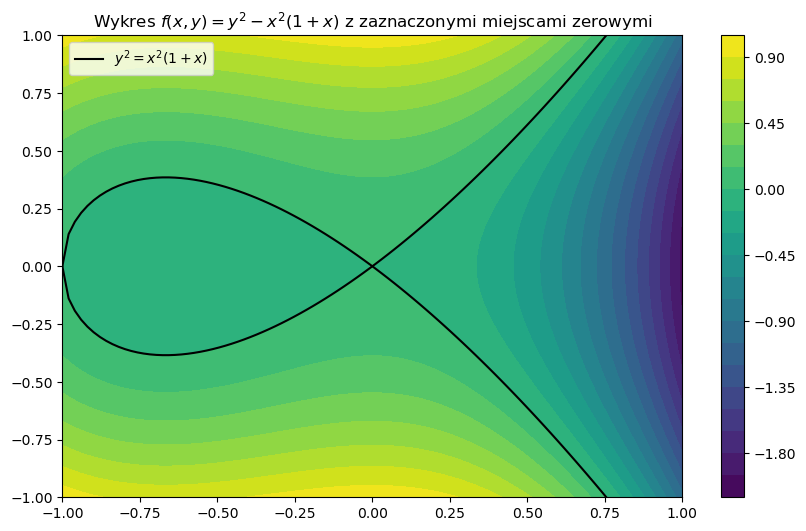

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

N = 100 # N**2 punktów na wykresie
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
Z = Y**2 - X**2*(1 + X)

fig, ax = plt.subplots(figsize=(10, 6))
cs = ax.contourf(X, Y, Z, levels=20, cmap='viridis')
fig.colorbar(cs)
ax.plot(x, x*np.sqrt(1 + x), 'black', label='$y^2 = x^2(1 + x)$')
ax.plot(x, -x*np.sqrt(1 + x), 'black')
ax.set(
    xlim=(-1, 1),
    ylim=(-1, 1),
    title='Wykres $f(x, y) = y^2 - x^2(1 + x)$ z zaznaczonymi miejscami zerowymi'
)
ax.legend();

## [Proste tablice wartości losowych](https://numpy.org/doc/stable/reference/random/generator.html#simple-random-data)

* **`np.random.integers()`** – Generuje tablicę z losowymi liczbami całkowitymi w zadanym przedziale.
* **`np.random.random()`** – Zwraca tablicę z losowymi wartościami zmiennoprzecinkowymi z rozkładu jednostajnego na przedziale $[0,1)$.
* **`np.random.randn()`** – Generuje tablicę z losowymi wartościami zmiennoprzecinkowymi z rozkładu normalnego (Gaussa) o średniej 0 i odchyleniu standardowym 1.
* **`np.random.choice()`** – Losowo wybiera elementy z podanego zbioru lub tablicy, z możliwością określenia prawdopodobieństwa wyboru poszczególnych elementów.
* **`np.random.bytes()`** – Generuje ciąg losowych bajtów o określonej długości.

## [Losowa zmiana porządku](https://numpy.org/doc/stable/reference/random/generator.html#permutations)

* **`np.random.shuffle()`** – Miesza elementy tablicy „w miejscu” (in-place).
* **`np.random.permutation()`** – Zwraca nową tablicę będącą losową permutacją elementów podanej tablicy. Jeśli podamy liczbę, funkcja wygeneruje permutację liczb od 0 do $n-1$, nie modyfikując oryginalnych danych.
* **`np.random.permuted()`** – Działa podobnie jak `permutation()`, zwracając nową, permutowaną kopię tablicy, pozostawiając oryginał nietknięty.

## [Rozkłady](https://numpy.org/doc/stable/reference/random/generator.html#distributions)

* `np.random.normal()` – Generuje tablicę z losowymi wartościami z rozkładu normalnego (Gaussa) o zadanym średnim i odchyleniu standardowym.
* `np.random.uniform()` – Generuje tablicę z losowymi wartościami z rozkładu jednostajnego na zadanym przedziale.
* `np.random.exponential()` – Generuje tablicę z losowymi wartościami z rozkładu wykładniczego o zadanym parametrze.
* `np.random.poisson()` – Generuje tablicę z losowymi wartościami z rozkładu Poissona o zadanym parametrze.
* `np.random.binomial()` – Generuje tablicę z losowymi wartościami z rozkładu dwumianowego o zadanym prawdopodobieństwie sukcesu i liczbie prób.
* itp.

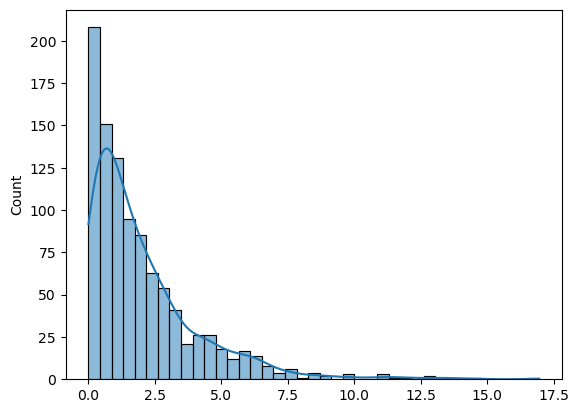

In [9]:
import seaborn as sns

N = 1000 ## Liczba losów

# arr = np.random.pareto(1.1, N)
arr = np.random.exponential(2, N)
sns.histplot(arr, kde=True);

## [Operacje macierzowe](https://numpy.org/doc/stable/reference/routines/array-creation.html#numerical-ranges)

* **`np.linalg.dot()`** – Oblicza iloczyn skalarny lub mnożenie macierzy w zależności od wymiarów wejściowych.
* **`np.linalg.multi_dot()`** – Wydajnie oblicza iloczyn kilku macierzy, optymalizując kolejność mnożeń.
* **`np.linalg.vdot()`** – Liczy iloczyn wektorowy, traktując argumenty jako spłaszczone tablice (dla liczb zespolonych sprzęga pierwszy argument).
* **`np.linalg.inner()`** – Zwraca sumę iloczynów odpowiadających sobie elementów dwóch tablic.
* **`np.linalg.outer()`** – Oblicza iloczyn zewnętrzny dwóch wektorów, tworząc macierz.
* **`np.linalg.matmul()` oraz operacja `@`** – Wykonują mnożenie macierzy, obsługując zarówno operacje na macierzach 2D, jak i na tablicach o wyższych wymiarach.
* **`np.linalg.matrix_power()`** – Podnosi kwadratową macierz do zadanej potęgi przez kolejne mnożenia.

## [Równania liniowe](https://numpy.org/doc/stable/reference/routines.linalg.html#solving-equations-and-inverting-matrices)

* **`np.linalg.solve()`** – Rozwiązuje układ równań liniowych $Ax = b$ dla macierzy kwadratowej $A$, zwracając wektor $x$.
* **`np.linalg.tensorsolve()`** – Rozwiązuje równanie liniowe, w którym macierz $A$ jest zastąpiona przez tensor, przy odpowiednim określeniu osi.
* **`np.linalg.lstsq()`** – Znajduje rozwiązanie układu równań metodą najmniejszych kwadratów, przydatne przy układach nadokreślonych lub niedookreślonych.
* **`np.linalg.inv()`** – Oblicza macierz odwrotną dla danej macierzy kwadratowej, jeśli taka istnieje.
* **`np.linalg.pinv()`** – Wyznacza macierz pseudoodwrotną (Moore-Penrose).
* **`np.linalg.tensorinv()`** – Oblicza odwrotność tensora poprzez reinterpretację wielowymiarowej tablicy jako macierzy, z uwzględnieniem odpowiedniego rozbicia indeksów.

## Łączenie i dzielenie tablic

* `np.concatenate()` – Łączy tablice wzdłuż zadanego wymiaru.
* `np.vstack()` – Łączy tablice wzdłuż pierwszego wymiaru.
* `np.hstack()` – Łączy tablice wzdłuż drugiego wymiaru.
* `np.split()` – Dzieli tablicę na podtablice.
* `np.vsplit()` – Dzieli tablicę wzdłuż pierwszego wymiaru.
* `np.hsplit()` – Dzieli tablicę wzdłuż drugiego wymiaru.

## Funkcje agregujące

* `np.sum()` – Sumuje wartości w tablicy.
* `np.min()`, `np.max()` – Znajduje wartość minimalną lub maksymalną.
* `np.mean()` – Oblicza średnią arytmetyczną.
* `np.median()` – Znajduje medianę.
* `np.std()` – Oblicza odchylenie standardowe.
* `np.var()` – Oblicza wariancję.
* i wiele innych ...

## [Broadcasting](https://numpy.org/doc/stable/user/theory.broadcasting.html?highlight=broadcasting)

Operowanie na tablicach o różnych kształtach.

### Reguły broadcastingu

1. Jeśli dwie tablice różnią się wymiarem, to kształt tej o mniejszym wymiarze jest uzupełniany od lewej jedynkami.
2. Jeśli rozmiary na danej osi nie są w obu tablicach równe, to ten który jest równy jeden, jest rozszerzany do większego rozmiaru.
3. Jeśli rozmiary na danej osi nie są w obu tablicach równe i żaden z nich nie jest równy jeden, to broadcasting nie może zostać wykonany. Wtedy rzucany jest wyjątek.

### Zadanie

Na których kształtach da się wykonać broadcasting?

1. `(1, 2)` i `(3, 4, 2)`
1. `(1, 2)` i `(3, 2, 4)`
1. `(5, 3, 8)` i `(5, 4, 8)`
1. `(5, 3, 8)` i `(5, 8)`
1. `(5, 3, 8)` i `(3, 8)`
1. `(5, 3, 8)` i `(5, 3)`

### Przykład


Wykres funkcji $z=\sin(\exp(2x^2)) + \sin(\exp(2y^2))$ w kwadracie $[-1, 1]\times[-1, 1]$:


In [10]:
x = np.linspace(-1, 1, 500)
y = np.linspace(-1, 1, 500)[:, np.newaxis]

z = np.sin(np.exp(2*x**2)) + np.cos(np.exp(2*y**2))

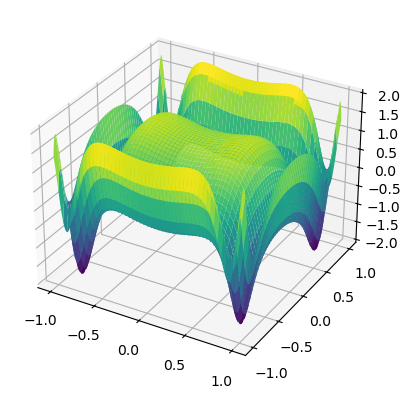

In [11]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis');
plt.show()

## [Indeksowanie](https://numpy.org/doc/stable/reference/arrays.indexing.html)

Korzysta ze zwykłej składni Pythona:

```
A[obj]
```

Od rodzaju `obj` zależy, czy indeksowanie będzie proste, czy złożone (*basic*/*advanced*).





## [Indeksowanie proste](https://numpy.org/doc/stable/reference/arrays.indexing.html#basic-slicing-and-indexing)

Zachodzi, gdy `obj` jest wycinkiem, liczbą całkowitą lub krotką wycinków i liczb całkowitych plus ewentualne `Ellipsis` i `np.newaxis`.

Kluczowe cechy:

* Zwraca widok oryginalnej tablicy, nie tworząc kopii danych.
* Umożliwia indeksowanie za pomocą liczb całkowitych lub wycinków dla każdego wymiaru.
* Operacje modyfikacji wykonane na zwróconym widoku wpływają na oryginalną tablicę.

## Indeksowanie złożone

`A[obj]` uruchamia indeksowanie złożone, gdy:
* `obj` jest sekwencją inną niż krotka, 
* `obj` jest tablicą NumPy o typie całkowitym lub logicznym,
* `obj` jest krotką z przynajmniej jedną sekwencją lub tablicą NumPy o typie całkowitym lub logicznym.

Wartość zwracana podczas indeksowania złożonego **jest kopią**.

## Indeksowanie i instrukcja przypisania

Oba rodzaje indeksowania można łączyć z instrukcją przypisania. Prowadzi to do modyfikacji oryginalnej tablicy.

```
A[obj] = v
```

<br>

Ale musi być możliwy *broadcast* `v` do kształtu `A[obj]`.